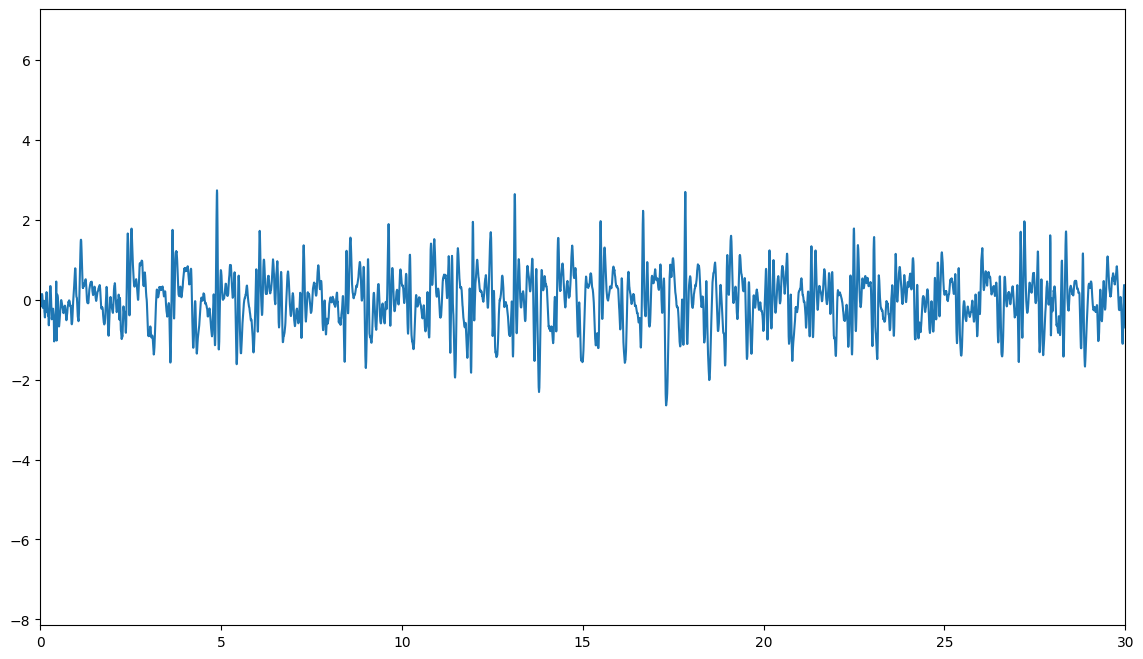

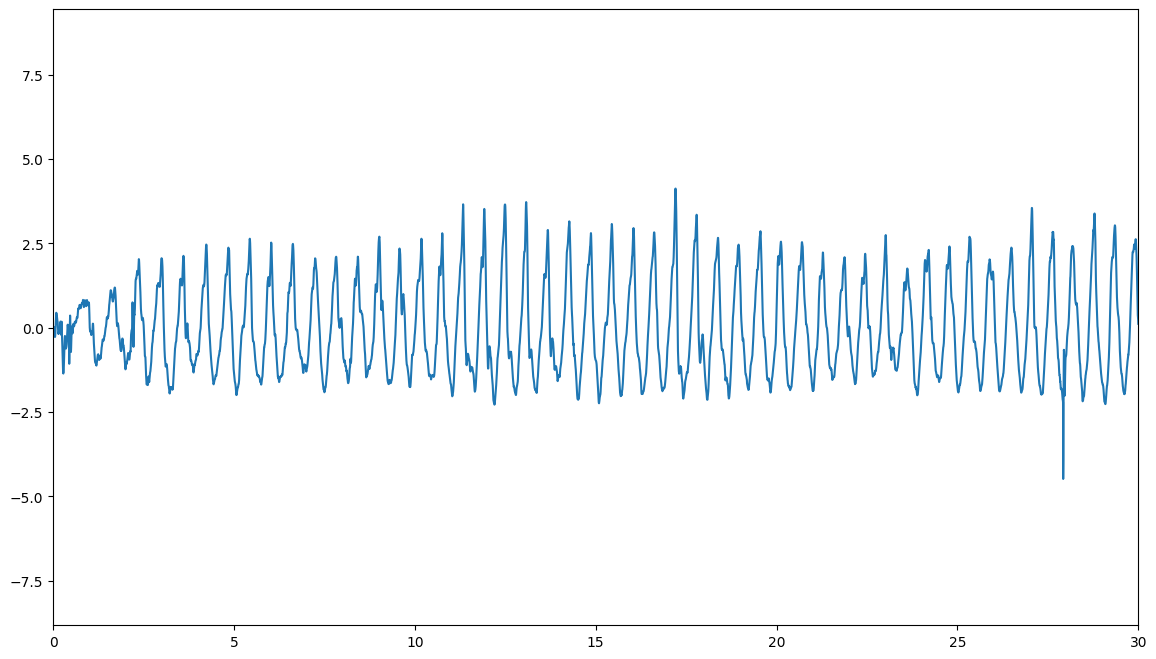

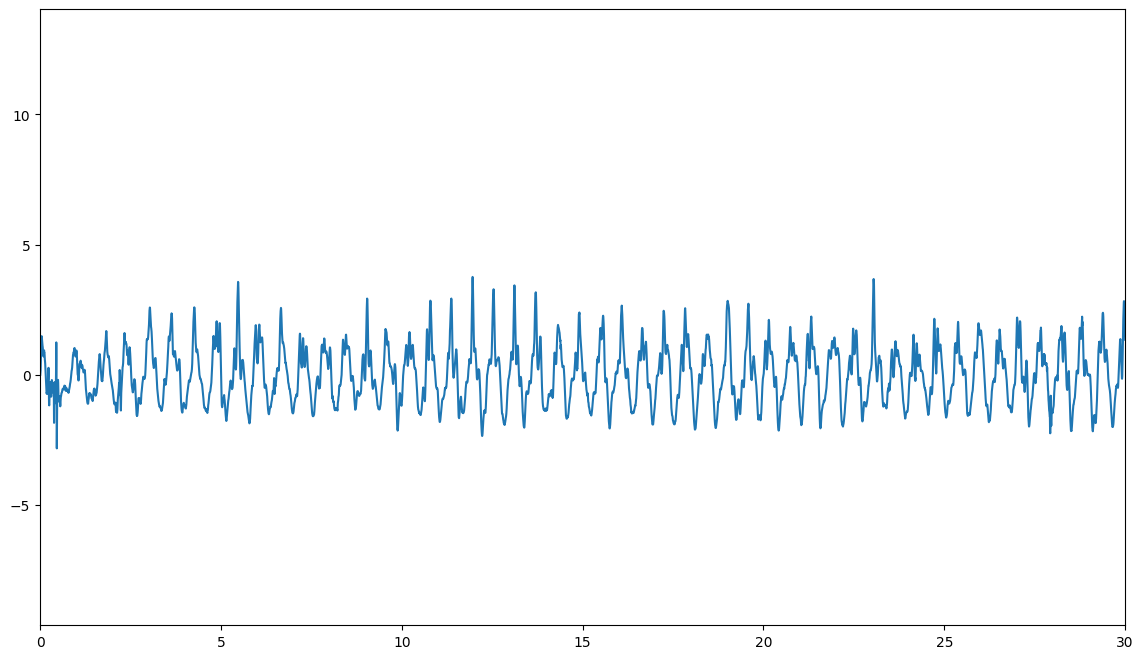

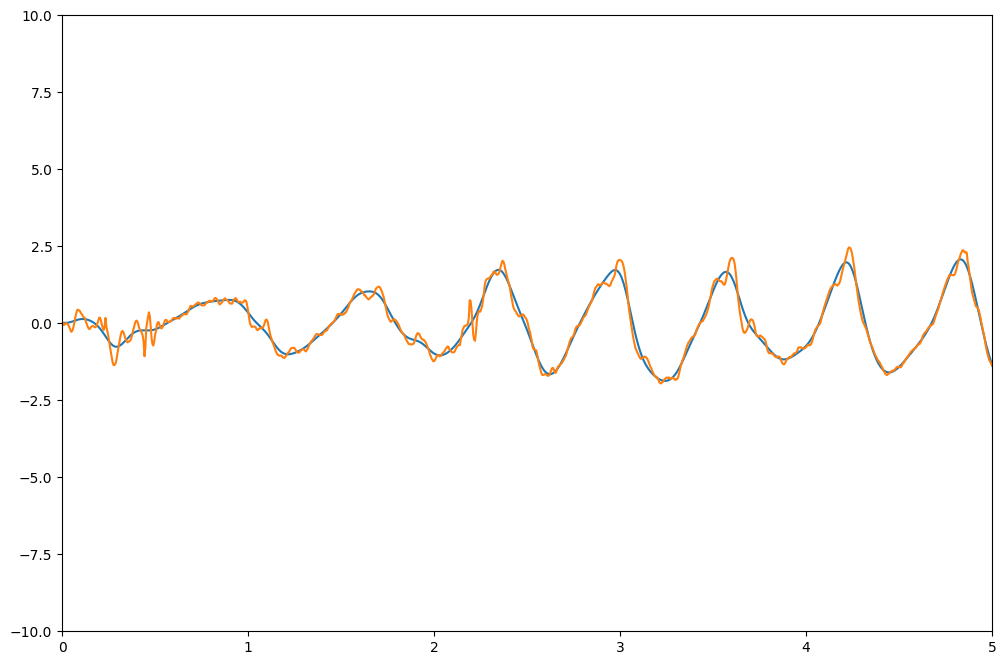

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dfLoc = pd.read_csv("./projectData/Location.csv")
dfAccel = pd.read_csv("./projectData/Linear Acceleration.csv")


plt.figure(figsize=(14, 8))
plt.plot(dfAccel["Time (s)"], dfAccel["Linear Acceleration x (m/s^2)"])
plt.axis([0, 30, dfAccel["Linear Acceleration x (m/s^2)"].min(), dfAccel["Linear Acceleration x (m/s^2)"].max()])
plt.show() 

plt.figure(figsize=(14, 8))
plt.plot(dfAccel["Time (s)"], dfAccel["Linear Acceleration y (m/s^2)"])
plt.axis([0, 30, dfAccel["Linear Acceleration y (m/s^2)"].min(), dfAccel["Linear Acceleration y (m/s^2)"].max()])   
plt.show() 

plt.figure(figsize=(14, 8))
plt.plot(dfAccel["Time (s)"], dfAccel["Linear Acceleration z (m/s^2)"])
plt.axis([0, 30, dfAccel["Linear Acceleration z (m/s^2)"].min(), dfAccel["Linear Acceleration z (m/s^2)"].max()])
plt.show() 

from scipy import signal

data = dfAccel["Linear Acceleration y (m/s^2)"]

def butter_lp(data,cutoff,nyq,order):
    normal_cutoff=cutoff/nyq
    b,a=signal.butter(order,normal_cutoff,btype='low',analog=False)
    y=signal.filtfilt(b,a,data)
    return y

cutoff=5
tdiff = dfAccel["Time (s)"].diff().dropna()
fs=1/tdiff.iloc[0]
nyq=fs/2
sig=data
data_filt=butter_lp(sig,cutoff,nyq,order=3)

plt.figure(figsize=(12,8))
plt.axis([0,5,-10,10])
plt.plot(dfAccel["Time (s)"], data_filt)
plt.plot(dfAccel["Time (s)"], data)